In [1]:
import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24

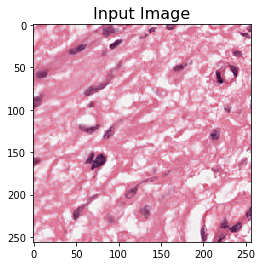

In [5]:
# Inputting image
input_image_file = ('/home/raj/github/glioma_histo_img_classifier_lob/images/TCGA-02-0001-01Z-00-DX2_20x_15424_10336_256x256.png')

im_input = skimage.io.imread(input_image_file)[:, :, :3]

plt.imshow(im_input)
_ = plt.title('Input Image', fontsize=16)

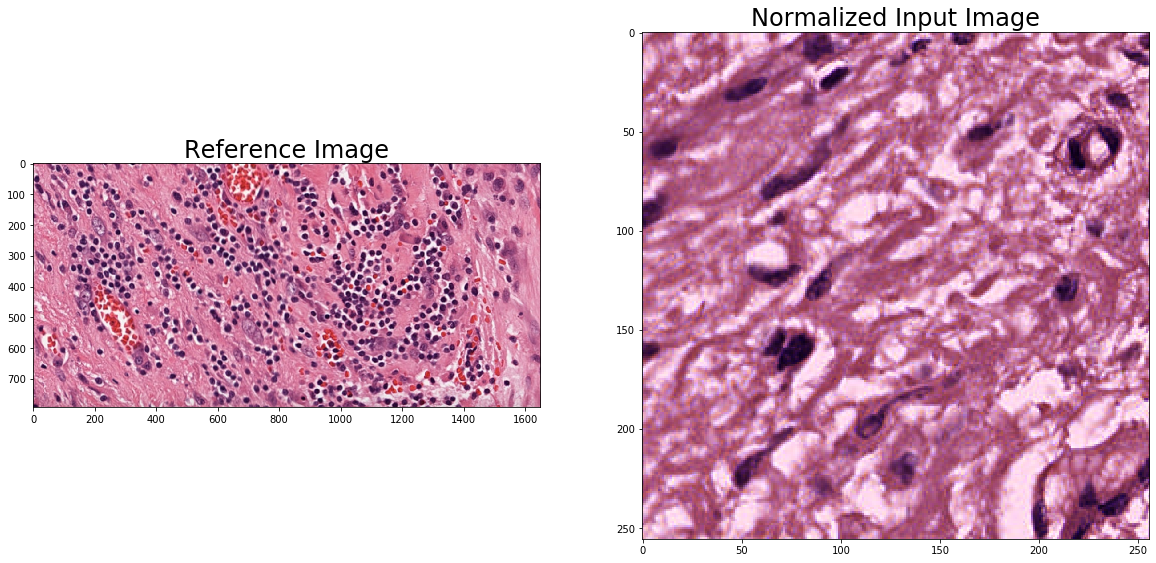

In [6]:
# Load reference image for normalization
ref_image_file = ('https://data.kitware.com/api/v1/file/'
                  '57718cc28d777f1ecd8a883c/download')  # L1.png

im_reference = skimage.io.imread(ref_image_file)[:, :, :3]

# get mean and stddev of reference image in lab space
mean_ref, std_ref = htk.preprocessing.color_conversion.lab_mean_std(im_reference)

# perform reinhard color normalization
im_nmzd = htk.preprocessing.color_normalization.reinhard(im_input, mean_ref, std_ref)

# Display results
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(im_reference)
_ = plt.title('Reference Image', fontsize=titlesize)

plt.subplot(1, 2, 2)
plt.imshow(im_nmzd)
_ = plt.title('Normalized Input Image', fontsize=titlesize)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
gray = rgb2gray(im_nmzd)

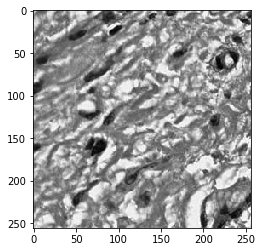

In [8]:
plt.imshow(gray, cmap = plt.get_cmap('gray'))

#plt.savefig('lena_greyscale.png')
plt.show()

In [9]:
gray.shape

(256, 256)

In [10]:
gray = gray.astype(int)

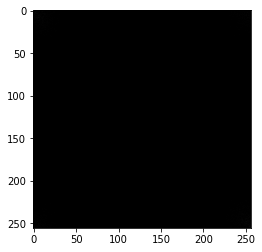

In [11]:
from scipy import fftpack, ndimage
import matplotlib.pyplot as plt

#image = ndimage.imread(im_input, flatten=True)     # flatten=True gives a greyscale image
fft_2 = fftpack.fft2(gray)
#fft_2 = fft_2.astype(int)
plt.imshow(abs(fft_2))
#plt.imshow(fft2)
#plt.show()

In [12]:
abs(fft_2)

array([[9697672.        ,  144883.25074192,   73595.76818615, ...,
         169118.3694951 ,   73595.76818615,  144883.25074192],
       [  93487.14878304,  161022.52031536,   96336.60098129, ...,
          61318.7134104 ,   49279.75515695,  122642.61002966],
       [  83366.94661115,  142190.37892321,  307115.80640087, ...,
          67541.9766556 ,   42078.62729663,   39258.43096723],
       ...,
       [ 151572.22470693,  105708.78032665,   75151.82904275, ...,
          71251.33679324,  159753.02685096,  145154.30941687],
       [  83366.94661115,   39258.43096723,   42078.62729663, ...,
          97655.79721203,  307115.80640087,  142190.37892321],
       [  93487.14878304,  122642.61002966,   49279.75515695, ...,
          73365.06219079,   96336.60098129,  161022.52031536]])

In [13]:
img2=gray

# Logarithmic application on Fourier Transforms values

In [14]:
import math 

In [15]:
for i in range(0,img2.shape[0]): # Change
    for j in range(0,img2.shape[1]): # Change
        if (math.log(1+img2[i,j],2)) < 0:
            img2[i,j]=0
        else:
            img2[i,j] = np.int(math.log(1+img2[i,j],2))

In [16]:
np.unique(img2)

array([2, 3, 4, 5, 6, 7, 8])

In [17]:
np.bincount(img2.ravel())

array([    0,     0,     7,   110,   541,  1949, 21935, 40990,     4])

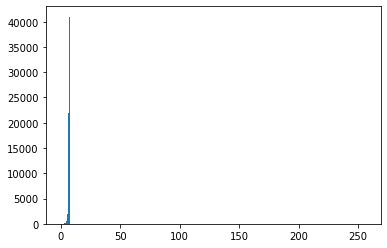

Maximum intensity =  8
minimum intensity =  2


In [18]:
plt.hist(img2.ravel(),256,[0,256]); plt.show()
img3 = img2
B = np.int(img3.max())
A = np.int(img3.min())
print ("Maximum intensity = ", B)
print ("minimum intensity = ", A)

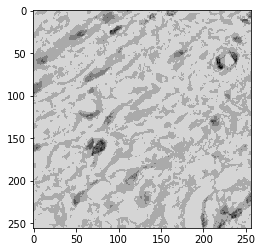

In [19]:
img2 = 36*img2
plt.imshow(img2)

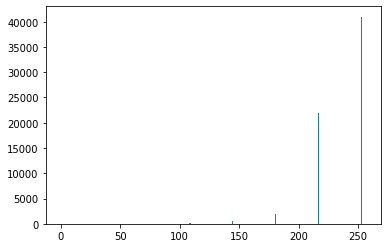

Maximum intensity =  288
minimum intensity =  72


In [20]:
plt.hist(img2.ravel(),256,[0,256]); plt.show()
B = np.int(img2.max())
A = np.int(img2.min())
print ("Maximum intensity = ", B)
print ("minimum intensity = ", A)